# Implementação do Adaline

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error
from random import randint

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }
plt.rcParams.update(params)

## Importando o dataset

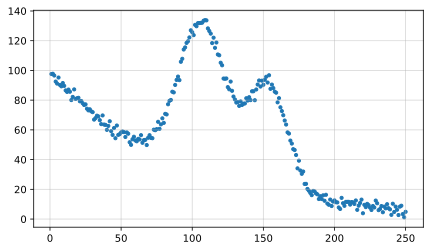

In [3]:
dataframe = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto_Perceptron_Adaline/Datasets/dataset_regression.csv", sep=";", header=None, names=["y","x"])

x = dataframe["x"].to_numpy()
y = dataframe["y"].to_numpy()

plt.scatter(x, y, s=10)
plt.grid(alpha=0.5)
plt.show()

## Definindo funções 

#### Função para adicionar 1 NO COMEÇO dos dados (BIAS)

In [4]:
def adicionarDimensaoBias(dados):    
    novosDados = []
    for dadoAtual in dados:
        novoDadoAtual = np.append(1, dadoAtual)
        novosDados.append(novoDadoAtual)
    return np.array(novosDados)

In [5]:
print(x[0])
print(x[0].shape)
x = adicionarDimensaoBias(x)
print(x[0])
print(x[0].shape)

1.0
()
[1. 1.]
(2,)


#### Função para iniciar os pesos zerados

Será necessário enviar o tamanho do vetor JÁ CONTANDO COM O BIAS!

In [6]:
def iniciarPesos(tamanho):
    return np.zeros(tamanho)

In [7]:
tamanho = len(x[0]) # JA TEM O BIAS
pesos   = iniciarPesos(tamanho)
print(pesos)
print(pesos.shape)

[0. 0.]
(2,)


#### Função para calcular a saída dado o vetor de pesos e o dado de entrada

In [8]:
def calcularSaida(pesos, dado):
    return np.matmul(pesos.T, dado)

In [9]:
saida = calcularSaida(pesos, x[0])
print(saida)

0.0


#### Função para calcular o MSE

In [10]:
def calcularMSE(dadosComBias, target, pesos):
    vetorErros = []
    for dadoAtual, targetAtual in zip(dadosComBias, target):
        erroAtual = targetAtual - calcularSaida(pesos, dadoAtual)
        vetorErros.append(erroAtual)
    vetorErros = np.array(vetorErros)
    return np.matmul(vetorErros.T, vetorErros)/len(target)

In [11]:
calcularMSE(x, y, pesos)

5084.391941310278

#### Função para realizar uma época e atualizando os pesos do neurônio

In [12]:
def atualizarPesosUnicaEpoca(xTreinamento, yTreinamento, pesos, taxaAprendizagem):
    
    # PASSANDO POR CADA DADO
    for dadoAtual, targetAtual in zip(xTreinamento, yTreinamento):

        # FAZENDO A PREDICAO DO DADO ATUAL
        saidaCalculadaAtual = calcularSaida(pesos, dadoAtual)
        
        # CALCULANDO O ERRO
        erroAtual = targetAtual - saidaCalculadaAtual

        # ATUALIZANDO O VETOR DE PESOS
        pesos = pesos + taxaAprendizagem * erroAtual * dadoAtual
        
    return pesos

In [13]:
print(pesos)
print(pesos.shape)
pesos = atualizarPesosUnicaEpoca(x, y, pesos, 0.00001)
print(pesos)
print(pesos.shape)

[0. 0.]
(2,)
[0.03085581 0.01616387]
(2,)


#### Função para ajustar os pesos do neurônio época após época

In [18]:
def iterarEpocasTreinamento(xTreinamento, yTreinamento, pesos, taxaAprendizagem=1e-6, qtdMaxEpocas=50000, percentualSemMelhora=0.35, armazenarEvolucao=True):
    
    # PRA GUARDAR A EVOLUCAO DAS PARADAS
    arrayMSEs           = [calcularMSE(xTreinamento, yTreinamento, pesos)]
    matrizEvolucaoPesos = [pesos]

    # VOU RETORNAR SO A MELHOR ITERACAO
    melhorMSE     = calcularMSE(xTreinamento, yTreinamento, pesos)
    melhoresPesos = pesos
    
    # COMECANDO
    epocas = 0
    qtdEpocasSemMelhoria = 0
    while epocas < qtdMaxEpocas:
        epocas += 1

        # COMECO VERIFICANDO O MSE DESSES PESOS
        MSEAtual = calcularMSE(xTreinamento, yTreinamento, pesos)

        # ARMAZENO A EVOLUCAO DA EPOCA
        if armazenarEvolucao == True:
            arrayMSEs.append(MSEAtual)
            matrizEvolucaoPesos.append(pesos)

        # VERIFICO SE FOI A MELHOR ITERACAO ATE AGORA
        if MSEAtual < melhorMSE:
            melhorMSE = MSEAtual
            melhoresPesos = pesos
            qtdEpocasSemMelhoria = 0
        else:
            qtdEpocasSemMelhoria += 1
            if qtdEpocasSemMelhoria/qtdMaxEpocas >= percentualSemMelhora:
                motivoParada = "Sem melhora no MSE há " + str(percentualSemMelhora*100) + "% do total de épocas."
                break

        # SE TIVER CONVERGIDO EU PARO
        if MSEAtual == 0:
            motivoParada = "O MSE de treinamento chegou a 0."
            break

        # SE NAO TIVER CONVERGIDO EU CONTINUO O ALGORITMO E AJUSTO OS PESOS DESSA EPOCA
        pesos = atualizarPesosUnicaEpoca(xTreinamento, yTreinamento, pesos, taxaAprendizagem)

    if epocas >= qtdMaxEpocas:
        motivoParada = "A quantidade máxima de épocas foi atingida."

    # TRANSFORMANDO OS ARRAYS EM NUMPY
    # VOU TRANSPOR A MATRIZ DE EVOLUCAO DOS PESOS, ASSIM, CADA LINHA E UM PESO E CADA COLUNA UMA EPOCA
    epocas              = np.array(epocas)
    arrayMSEs           = np.array(arrayMSEs)
    matrizEvolucaoPesos = np.array(matrizEvolucaoPesos).T

    # AGORA QUE TERMINOU, OS PESOS DA CLASSE SERAO OS MELHORES PESOS DESSA FUNCAO
    pesos = melhoresPesos

    return pesos, epocas, arrayMSEs, matrizEvolucaoPesos, motivoParada

In [15]:
pesos, epocas, arrayMSEs, matrizEvolucaoPesos, motivoParada = iterarEpocasTreinamento(x, y, pesos)

In [16]:
print("Épocas utilizadas:", epocas)
print("Motivo de parada:", motivoParada)
print("Pesos finais:", pesos)

Épocas utilizadas: 100000
Motivo de parada: A quantidade máxima de épocas foi atingida.
Pesos finais: [98.70781567 -0.36851152]


Text(0, 0.5, 'MSE')

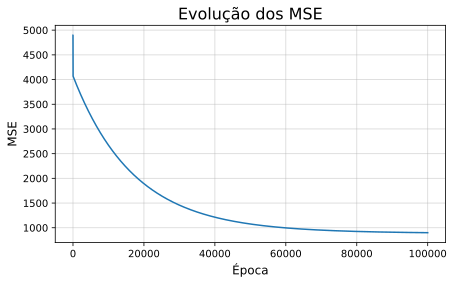

In [17]:
plt.plot(arrayMSEs)
plt.grid(alpha=0.5)
plt.title("Evolução dos MSE")
plt.xlabel("Época")
plt.ylabel("MSE")

#### Função de treinamento do neurônio

Primeiro, como tem toda a bagunça de adicionar bias no final dos arrays, vou importar o dataset de novo.

In [37]:
dataframe = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto_Perceptron_Adaline/Datasets/dataset_regression.csv", sep=";", header=None, names=["y","x"])
x = dataframe["x"].to_numpy()
y = dataframe["y"].to_numpy()
xTrain, xTest, yTrain, yTest = tts(x, y, test_size=0.25, shuffle=True)

In [21]:
def treinar(xTreinamento, yTreinamento, taxaAprendizagem=1e-6, qtdMaxEpocas=50000, percentualSemMelhora=0.35, armazenarEvolucao=True):
    
    # COLOCANDO A DIMENSAO DO BIAS NO FINAL DE CADA DADO
    xTreinamento = adicionarDimensaoBias(xTreinamento)

    # INICIANDO O VETOR DE PESOS
    pesos = iniciarPesos(len(xTreinamento[0]))

    # TREINANDO DE FATO
    pesos, epocas, arrayMSEs, matrizEvolucaoPesos, motivoParada = iterarEpocasTreinamento(xTreinamento, yTreinamento, pesos, taxaAprendizagem, qtdMaxEpocas, percentualSemMelhora, armazenarEvolucao)
    
    return pesos, epocas, arrayMSEs, matrizEvolucaoPesos, motivoParada

In [22]:
pesos, epocas, arrayMSEs, matrizEvolucaoPesos, motivoParada = treinar(xTrain, yTrain)

Text(0, 0.5, 'MSE')

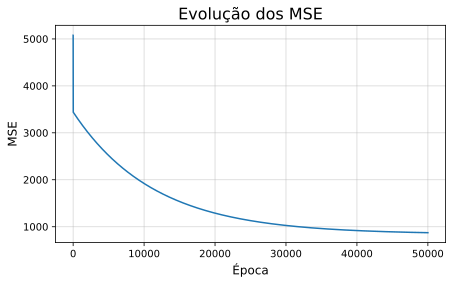

In [23]:
plt.plot(arrayMSEs)
plt.grid(alpha=0.5)
plt.title("Evolução dos MSE")
plt.xlabel("Época")
plt.ylabel("MSE")

Text(0, 0.5, 'Valor')

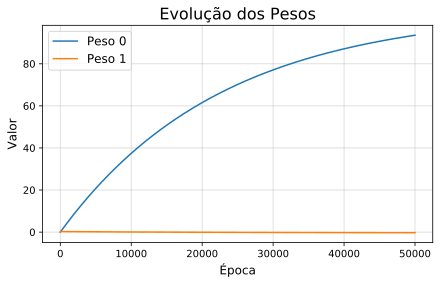

In [25]:
plt.plot(matrizEvolucaoPesos[0], label="Peso 0")
plt.plot(matrizEvolucaoPesos[1], label="Peso 1")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Evolução dos Pesos")
plt.xlabel("Época")
plt.ylabel("Valor")

#### Função para predizer todos os dados do conjunto de teste

In [26]:
def predizer(xTeste, pesos):        
    # ADICIONANDO UMA DIMENSAO PARA O BIAS
    xTeste = adicionarDimensaoBias(xTeste)
    # PREDIZENDO CADA DADO
    yPred = []        
    for dadoAtual in xTeste:
        yPred.append(calcularSaida(pesos, dadoAtual))
    return yPred

In [29]:
yPred = predizer(xTest, pesos)
mean_squared_error(yTest, yPred)

786.9814718488232

#### Função para visualização da reta encontrada

In [31]:
def obterEixosParaPlotarRetaAdaline(dadosOriginais, pesos):
    # OBVIAMENTE SO FUNCIONA PARA CASOS DE UMA UNICA FEATURE
    eixoXRetaAdaline = [dadosOriginais[0], dadosOriginais[-1]]
    eixoYRetaAdaline = [pesos[0]+dadosOriginais[0]*pesos[1], pesos[0]+dadosOriginais[-1]*pesos[1]]
    return eixoXRetaAdaline, eixoYRetaAdaline

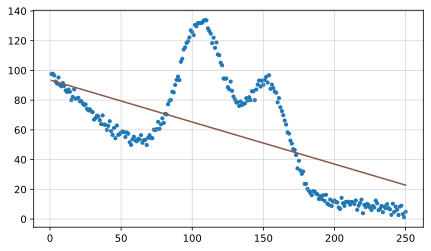

In [39]:
dataframe = pd.read_csv("/home/dimi/Programming/MachineLearningUFABC/Projeto_Perceptron_Adaline/Datasets/dataset_regression.csv", sep=";", header=None, names=["y","x"])
x = dataframe["x"].to_numpy()
y = dataframe["y"].to_numpy()

eixoXRetaAdaline, eixoYRetaAdaline = obterEixosParaPlotarRetaAdaline(x, pesos)
plt.scatter(x, y, s=10)
plt.plot(eixoXRetaAdaline, eixoYRetaAdaline, color="tab:brown")
plt.grid(alpha=0.5)
plt.show()